<a href="https://colab.research.google.com/github/zendhiyb/Analisis-Sentimen-Aplikasi-TikTok-di-Play-Store-dengan-Metode-LSTM/blob/main/sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
file_path = '/content/drive/MyDrive/Penambangan/DATASET/GOOGLE_PLAY/Tiktok/dataset_googleplay_tiktok.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,79c3ff4f-c882-4aaf-9a00-e0e4eab0c0d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Juesapoiuesa,3,0,NaN,2024-12-23 04:16:10,NaN,NaN,NaN
1,1,d5aa18f2-1b4b-4fac-b9f9-e260f2316749,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Every time I want to open TikTok, TikTok exits...",3,0,37.9.2,2024-12-23 03:26:06,NaN,NaN,37.9.2
2,2,6ac6336c-ac89-4c95-936a-f87f50e1c69a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setiap masuk malah keluar sendiri gimana sih,1,0,NaN,2024-12-23 02:56:14,NaN,NaN,NaN
3,3,9d9b72c2-dbee-4979-8e57-7376b2a8e95c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong di perbaiki lagi, karna biasanya saat a...",5,1,37.8.5,2024-12-23 02:56:00,NaN,NaN,37.8.5
4,4,03d69edb-bb3d-4ded-8f91-435e06a384ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus ya,5,0,37.9.2,2024-12-22 22:50:25,NaN,NaN,37.9.2


In [5]:
total_rows = df.shape[0]
result = pd.DataFrame([total_rows], columns=['Total Komentar'])
result

,Total Komentar
0,20000


In [6]:
if 'score' in df.columns:
    score_distribution = df['score'].value_counts().sort_index()
    score_table = pd.DataFrame({
        'Score': score_distribution.index,
        'Frequency': score_distribution.values
    })

    score_table
else:
    print("Kolom 'score' tidak ditemukan dalam data.")

score_table

,Score,Frequency
0,1,4244
1,2,1268
2,3,1314
3,4,1587
4,5,11587


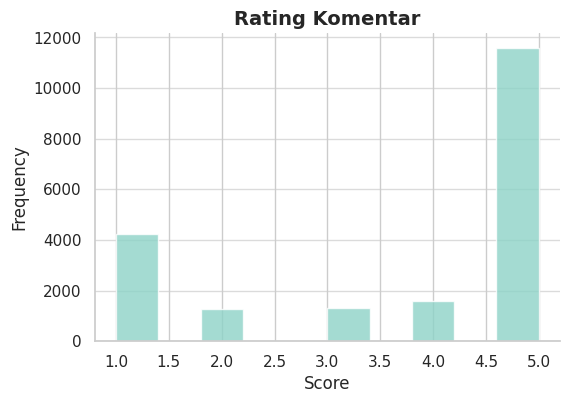

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 4))
df['score'].plot(kind='hist', bins=10, color='#8dd3c7', alpha=0.8, edgecolor='white',title='Distribusi Skor')

plt.xlabel("Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Rating Komentar", fontsize=14, fontweight='bold')
plt.show()

In [8]:
df = pd.read_csv(file_path)

def label_sentiment(score):
    if score >= 1 and score <= 3:
        return 'Negatif'
    elif score >= 4 and score <= 5:
        return 'Positif'
    else:
        return 'Tidak Diketahui'

df['sentiment'] = df['score'].apply(label_sentiment)
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment
0,0,79c3ff4f-c882-4aaf-9a00-e0e4eab0c0d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Juesapoiuesa,3,0,NaN,2024-12-23 04:16:10,NaN,NaN,NaN,Negatif
1,1,d5aa18f2-1b4b-4fac-b9f9-e260f2316749,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Every time I want to open TikTok, TikTok exits...",3,0,37.9.2,2024-12-23 03:26:06,NaN,NaN,37.9.2,Negatif
2,2,6ac6336c-ac89-4c95-936a-f87f50e1c69a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setiap masuk malah keluar sendiri gimana sih,1,0,NaN,2024-12-23 02:56:14,NaN,NaN,NaN,Negatif
3,3,9d9b72c2-dbee-4979-8e57-7376b2a8e95c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong di perbaiki lagi, karna biasanya saat a...",5,1,37.8.5,2024-12-23 02:56:00,NaN,NaN,37.8.5,Positif
4,4,03d69edb-bb3d-4ded-8f91-435e06a384ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus ya,5,0,37.9.2,2024-12-22 22:50:25,NaN,NaN,37.9.2,Positif


In [49]:
df.to_csv('dataset_label.csv', index=False)

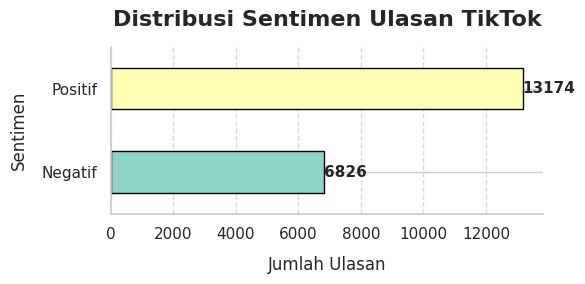

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

# Menghitung jumlah data berdasarkan sentimen
sentiment_counts = df.groupby('sentiment').size()

# Membuat plot horizontal
plt.figure(figsize=(6, 3))
colors = sns.color_palette('Set3')  # Palet warna yang lebih cerah dan modern
sentiment_counts.plot(
    kind='barh',
    color=colors,
    edgecolor='black',
    linewidth=1
)

# Menambahkan detail pada grafik
plt.title('Distribusi Sentimen Ulasan TikTok', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Jumlah Ulasan', fontsize=12, labelpad=10)
plt.ylabel('Sentimen', fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

for i, value in enumerate(sentiment_counts):
    plt.text(value + 1, i, str(value), va='center', fontsize=11, fontweight='bold')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('dataset_label.csv', index=False)

In [10]:
sentiment = '/content/drive/MyDrive/Penambangan/DATASET/GOOGLE_PLAY/Tiktok/dataset_label.csv'
df = pd.read_csv(sentiment)

In [11]:
!pip install indoNLP

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.9 MB/s eta 0:00:00


In [12]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [13]:
import re
import json
from indoNLP.preprocessing import replace_slang
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords

In [14]:
data = pd.read_csv(sentiment)

# Cleaning
def clean_comment(comment):
    comment = re.sub(r'https?\S+', ' ', comment)
    comment = re.sub(r'@\S+', ' ', comment)
    comment = re.sub(r'#\S+', ' ', comment)
    comment = re.sub(r"\'\w+", ' ', comment)
    comment = re.sub(r'[^\w\s]', ' ', comment)
    comment = re.sub(r'\b2\b', ' ', comment)
    return comment.strip()

data['cleaned_comment'] = data['content'].apply(clean_comment)
data = data[data['cleaned_comment'] != '']

# Case Folding
data['case_folded_comment'] = data['cleaned_comment'].str.lower()

# stopwords
nltk.download('stopwords')
stopwords_indonesia = stopwords.words('indonesian')
custom_stopwords = ['']
stopwords_indonesia.extend(custom_stopwords)
data['comment_without_stopwords'] = data['case_folded_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stopwords_indonesia])
)

# slang
file_json = '/content/drive/MyDrive/Penambangan/DATASET/GOOGLE_PLAY/Tiktok/slang.json'
with open(file_json, 'r', encoding='utf-8') as file:
    slang_dict = json.load(file)
def replace_slang_words(comment):
    words = comment.split()
    replaced_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(replaced_words)
data['slang_replaced_comment'] = data['comment_without_stopwords'].apply(replace_slang_words)

# Stemming Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data['stemmed_comment'] = data['slang_replaced_comment'].apply(
    lambda x: ' '.join([stemmer.stem(word) for word in x.split()])
)

# Tokenisasi
data['tokens_final'] = data['stemmed_comment'].apply(lambda x: x.split())
output = data[['content', 'cleaned_comment', 'case_folded_comment', 'comment_without_stopwords', 'slang_replaced_comment', 'stemmed_comment', 'tokens_final']].head(15)
output


<ipython-input-14-c88b8d18077e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['case_folded_comment'] = data['cleaned_comment'].str.lower()
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,content,cleaned_comment,case_folded_comment,comment_without_stopwords,slang_replaced_comment,stemmed_comment,tokens_final
0,Juesapoiuesa,Juesapoiuesa,juesapoiuesa,juesapoiuesa,juesapoiuesa,juesapoiuesa,[juesapoiuesa]
1,"Every time I want to open TikTok, TikTok exits...",Every time I want to open TikTok TikTok exits...,every time i want to open tiktok tiktok exits...,every time i want to open tiktok tiktok exits ...,every time i want to open tiktok tiktok exits ...,every time i want to open tiktok tiktok exits ...,"[every, time, i, want, to, open, tiktok, tikto..."
2,Setiap masuk malah keluar sendiri gimana sih,Setiap masuk malah keluar sendiri gimana sih,setiap masuk malah keluar sendiri gimana sih,masuk gimana sih,masuk bagaimana sih,masuk bagaimana sih,"[masuk, bagaimana, sih]"
3,"Tolong di perbaiki lagi, karna biasanya saat a...",Tolong di perbaiki lagi karna biasanya saat a...,tolong di perbaiki lagi karna biasanya saat a...,tolong perbaiki karna apk tt apk nya lamaa ban...,tolong perbaiki karena apk tt apk nya lamaa ba...,tolong baik karena apk tt apk nya lamaa banget...,"[tolong, baik, karena, apk, tt, apk, nya, lama..."
4,Bagus ya,Bagus ya,bagus ya,bagus ya,bagus iya,bagus iya,"[bagus, iya]"
5,banyak orang dongok,banyak orang dongok,banyak orang dongok,orang dongok,orang dongok,orang dongok,"[orang, dongok]"
6,po Ooo Oopl O L,po Ooo Oopl O L,po ooo oopl o l,po ooo oopl o l,po ooo oopl o l,po ooo oopl o l,"[po, ooo, oopl, o, l]"
7,gtw mles,gtw mles,gtw mles,gtw mles,tidak tahu mles,tidak tahu mles,"[tidak, tahu, mles]"
8,Apkny bgus tpi bnyk bug ny cik,Apkny bgus tpi bnyk bug ny cik,apkny bgus tpi bnyk bug ny cik,apkny bgus tpi bnyk bug ny cik,apkny bgus tapi banyak bug ny cik,apkny bgus tapi banyak bug ny cik,"[apkny, bgus, tapi, banyak, bug, ny, cik]"
9,bug nya malah makin parah setelah update serin...,bug nya malah makin parah setelah update serin...,bug nya malah makin parah setelah update serin...,bug nya parah update aplikasi,bug nya parah update aplikasi,bug nya parah update aplikasi,"[bug, nya, parah, update, aplikasi]"


In [19]:
data['text_string'] = data['tokens_final'].apply(lambda x: ' '.join([item for item in x if len(item)>3]))
data.head(5)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sentiment,cleaned_comment,case_folded_comment,comment_without_stopwords,slang_replaced_comment,stemmed_comment,tokens_final,text_string
0,0,79c3ff4f-c882-4aaf-9a00-e0e4eab0c0d2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Juesapoiuesa,3,0,NaN,2024-12-23 04:16:10,NaN,NaN,NaN,Negatif,Juesapoiuesa,juesapoiuesa,juesapoiuesa,juesapoiuesa,juesapoiuesa,[juesapoiuesa],juesapoiuesa
1,1,d5aa18f2-1b4b-4fac-b9f9-e260f2316749,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Every time I want to open TikTok, TikTok exits...",3,0,37.9.2,2024-12-23 03:26:06,NaN,NaN,37.9.2,Negatif,Every time I want to open TikTok TikTok exits...,every time i want to open tiktok tiktok exits...,every time i want to open tiktok tiktok exits ...,every time i want to open tiktok tiktok exits ...,every time i want to open tiktok tiktok exits ...,"[every, time, i, want, to, open, tiktok, tikto...",every time want open tiktok tiktok exits itsel...
2,2,6ac6336c-ac89-4c95-936a-f87f50e1c69a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setiap masuk malah keluar sendiri gimana sih,1,0,NaN,2024-12-23 02:56:14,NaN,NaN,NaN,Negatif,Setiap masuk malah keluar sendiri gimana sih,setiap masuk malah keluar sendiri gimana sih,masuk gimana sih,masuk bagaimana sih,masuk bagaimana sih,"[masuk, bagaimana, sih]",masuk bagaimana
3,3,9d9b72c2-dbee-4979-8e57-7376b2a8e95c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong di perbaiki lagi, karna biasanya saat a...",5,1,37.8.5,2024-12-23 02:56:00,NaN,NaN,37.8.5,Positif,Tolong di perbaiki lagi karna biasanya saat a...,tolong di perbaiki lagi karna biasanya saat a...,tolong perbaiki karna apk tt apk nya lamaa ban...,tolong perbaiki karena apk tt apk nya lamaa ba...,tolong baik karena apk tt apk nya lamaa banget...,"[tolong, baik, karena, apk, tt, apk, nya, lama...",tolong baik karena lamaa banget masuk hapus do...
4,4,03d69edb-bb3d-4ded-8f91-435e06a384ed,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Bagus ya,5,0,37.9.2,2024-12-22 22:50:25,NaN,NaN,37.9.2,Positif,Bagus ya,bagus ya,bagus ya,bagus iya,bagus iya,"[bagus, iya]",bagus


In [20]:
import os
print(os.listdir())


['.config', 'drive', 'dataset_clean.csv', '.ipynb_checkpoints', 'sample_data']


In [24]:
data.to_csv('dataset_clean.csv', index=False)

In [25]:
data['text_string'] = data['text_string'].astype('str')
data['text_string'] = data['text_string'].astype(pd.StringDtype())
data.dtypes

,0
Unnamed: 0,int64
reviewId,object
userName,object
userImage,object
content,object
score,int64
thumbsUpCount,int64
reviewCreatedVersion,object
at,object
replyContent,object


In [26]:
!pip install wordcloud

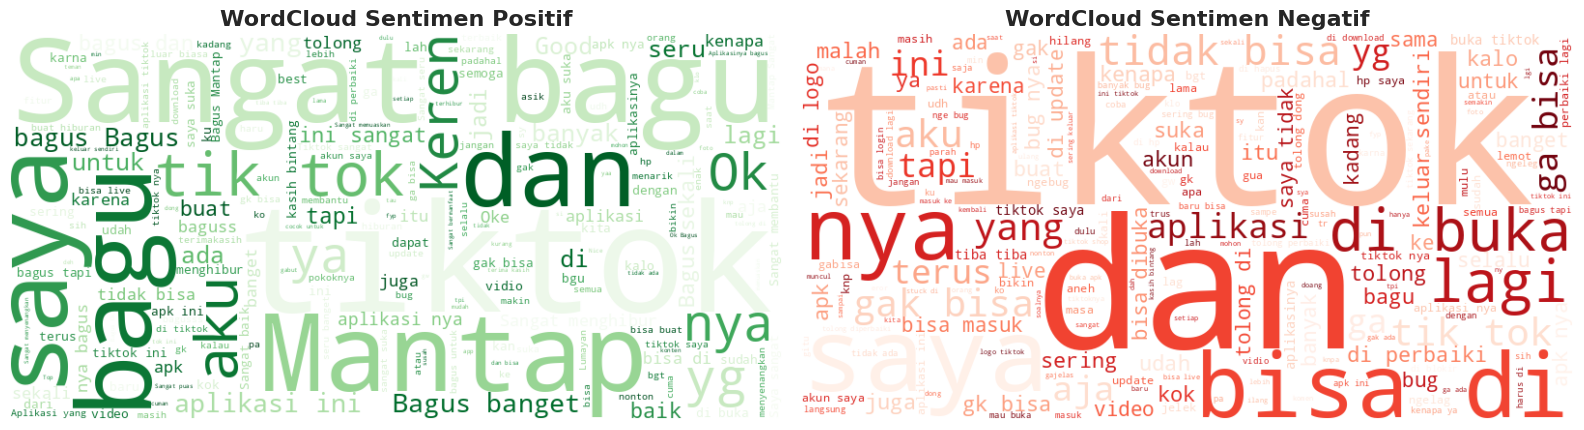

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['sentiment'] = df['score'].apply(label_sentiment)

positif_text = " ".join(df[df['sentiment'] == 'Positif']['content'].astype(str))
negatif_text = " ".join(df[df['sentiment'] == 'Negatif']['content'].astype(str))

wordcloud_positif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Greens',
    max_words=200,
    contour_width=1,
    contour_color='green'
).generate(positif_text)

wordcloud_negatif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=200,
    contour_width=1,
    contour_color='red'
).generate(negatif_text)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title('WordCloud Sentimen Positif', fontsize=16, fontweight='bold')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title('WordCloud Sentimen Negatif', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
print(data.columns)

Index(['Unnamed: 0', 'reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'cleaned_comment', 'case_folded_comment',
       'comment_without_stopwords', 'slang_replaced_comment',
       'stemmed_comment', 'tokens_final', 'text_string'],
      dtype='object')


In [30]:
X = data['text_string']
y = data['sentiment']
tfid = TfidfVectorizer()
X_final = tfid.fit_transform(X)

In [31]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [34]:
!pip install tensorflow

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = data['text_string']
y = data['sentiment']
le = LabelEncoder()
y_encoded = le.fit_transform(y)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)
max_len = max(len(seq) for seq in X_tokenized)
X_padded = pad_sequences(X_tokenized, maxlen=max_len, padding='post')
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_padded, y_encoded)
train_sizes = [90, 80, 70, 60, 50, 40, 30, 20, 10]
results = []
confusion_matrices = {}

for train_size in train_sizes:
    test_size = 100 - train_size

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=train_size/100, test_size=test_size/100, random_state=42)
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(128),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Threshold 0.5
    report = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    label = le.classes_[1]
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[train_size] = cm
    results.append({
        "Train Size": train_size,
        "Test Size": test_size,
        "(LSTM) Accuracy": report_df.loc['accuracy'].values[0],
        "(LSTM) Precision": report_df.loc[label, 'precision'],
        "(LSTM) Recall": report_df.loc[label, 'recall'],
        "(LSTM) F1-Score": report_df.loc[label, 'f1-score'],
        "(LSTM) Support": report_df.loc[label, 'support'],
    })

results_df = pd.DataFrame(results)
results_df

81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
402/402 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step
483/483 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step
643/643 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step
724/724 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step


,Train Size,Test Size,(LSTM) Accuracy,(LSTM) Precision,(LSTM) Recall,(LSTM) F1-Score,(LSTM) Support
0,90,10,0.813302,0.800872,0.842508,0.821162,1308.0
1,80,20,0.795799,0.809543,0.775668,0.792244,2581.0
2,70,30,0.801763,0.800621,0.803321,0.801969,3854.0
3,60,40,0.798036,0.781852,0.824448,0.802585,5121.0
4,50,50,0.797977,0.803990,0.788877,0.796362,6437.0
5,40,60,0.797874,0.796070,0.802044,0.799046,7729.0
6,30,70,0.794021,0.799910,0.785999,0.792893,9028.0
7,20,80,0.772997,0.749383,0.823051,0.784491,10325.0
8,10,90,0.770388,0.742084,0.831482,0.784244,11613.0


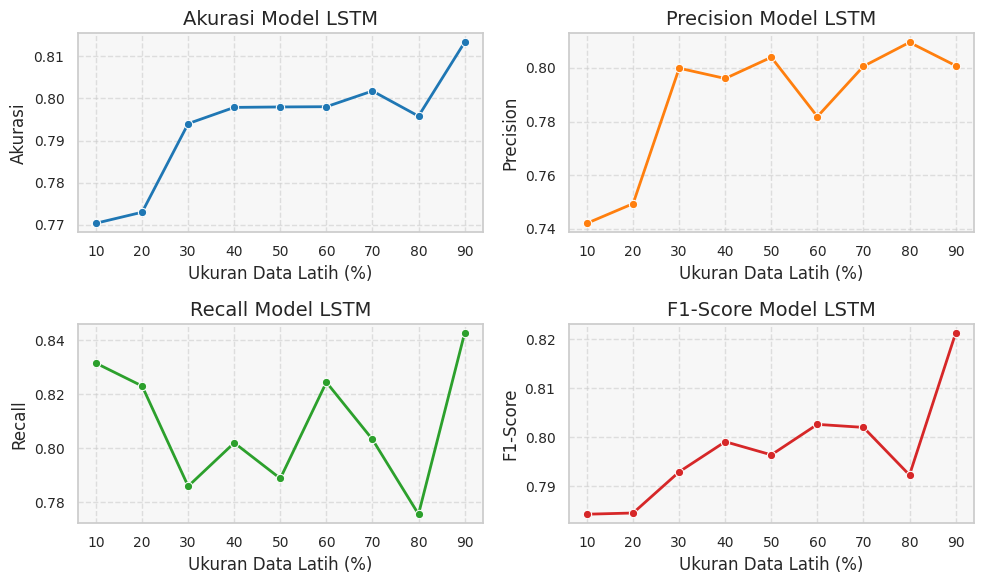

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat grafik untuk metrik (Akurasi, Precision, Recall, F1-Score)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Menyiapkan data untuk plotting
metrics_values = [
    results_df["(LSTM) Accuracy"],
    results_df["(LSTM) Precision"],
    results_df["(LSTM) Recall"],
    results_df["(LSTM) F1-Score"]
]

# Membuat subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Setel style seaborn untuk grafis
sns.set(style="whitegrid")

# Warna untuk garis plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot Akurasi
sns.lineplot(x=results_df["Train Size"], y=metrics_values[0], marker='o', ax=axes[0, 0], color=colors[0], linewidth=2)
axes[0, 0].set_title("Akurasi Model LSTM", fontsize=14)
axes[0, 0].set_xlabel("Ukuran Data Latih (%)", fontsize=12)
axes[0, 0].set_ylabel("Akurasi", fontsize=12)
axes[0, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot Precision
sns.lineplot(x=results_df["Train Size"], y=metrics_values[1], marker='o', ax=axes[0, 1], color=colors[1], linewidth=2)
axes[0, 1].set_title("Precision Model LSTM", fontsize=14)
axes[0, 1].set_xlabel("Ukuran Data Latih (%)", fontsize=12)
axes[0, 1].set_ylabel("Precision", fontsize=12)
axes[0, 1].tick_params(axis='both', which='major', labelsize=10)

# Plot Recall
sns.lineplot(x=results_df["Train Size"], y=metrics_values[2], marker='o', ax=axes[1, 0], color=colors[2], linewidth=2)
axes[1, 0].set_title("Recall Model LSTM", fontsize=14)
axes[1, 0].set_xlabel("Ukuran Data Latih (%)", fontsize=12)
axes[1, 0].set_ylabel("Recall", fontsize=12)
axes[1, 0].tick_params(axis='both', which='major', labelsize=10)

# Plot F1-Score
sns.lineplot(x=results_df["Train Size"], y=metrics_values[3], marker='o', ax=axes[1, 1], color=colors[3], linewidth=2)
axes[1, 1].set_title("F1-Score Model LSTM", fontsize=14)
axes[1, 1].set_xlabel("Ukuran Data Latih (%)", fontsize=12)
axes[1, 1].set_ylabel("F1-Score", fontsize=12)
axes[1, 1].tick_params(axis='both', which='major', labelsize=10)

# Menambahkan grid dan gaya visual untuk keseluruhan plot
for ax in axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_facecolor('#f7f7f7')

# Penataan akhir grafik
plt.tight_layout()
plt.show()


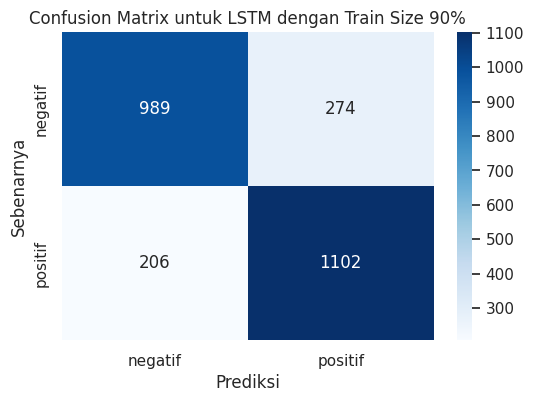

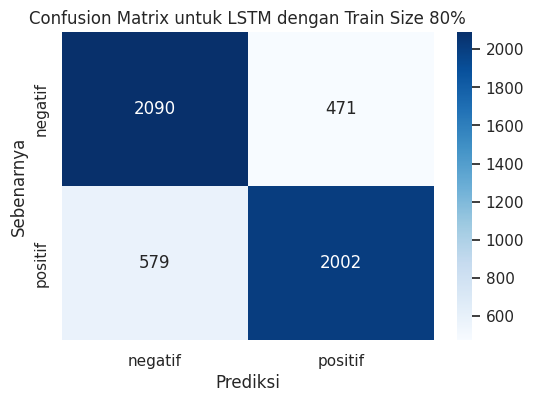

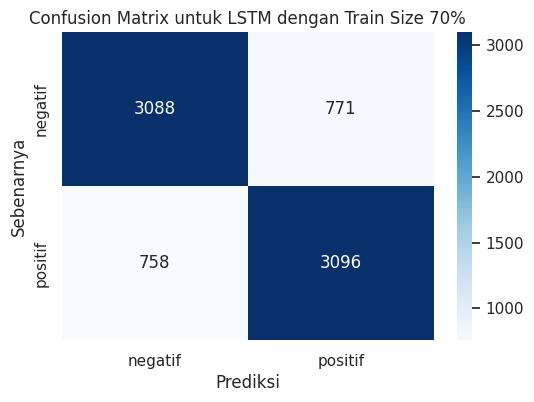

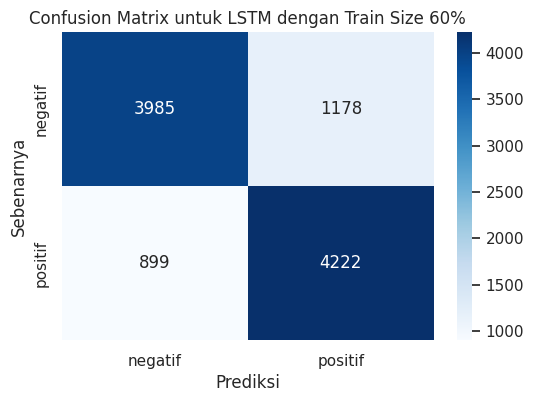

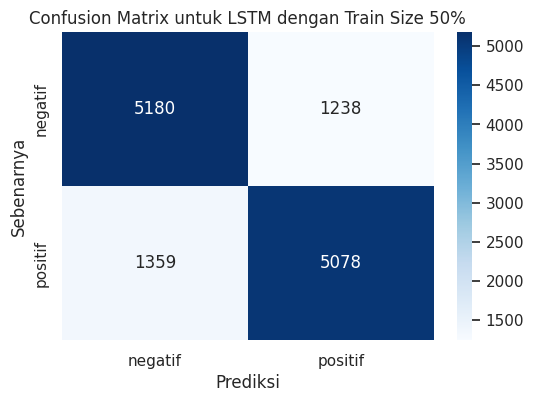

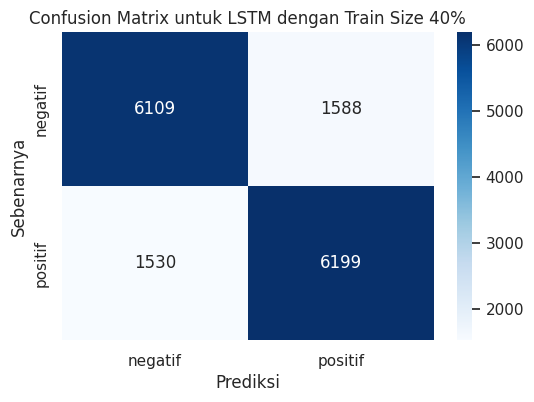

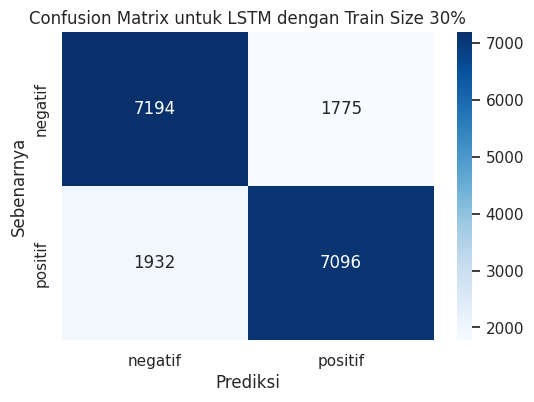

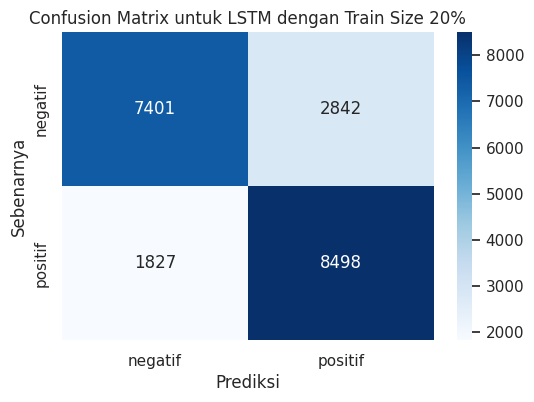

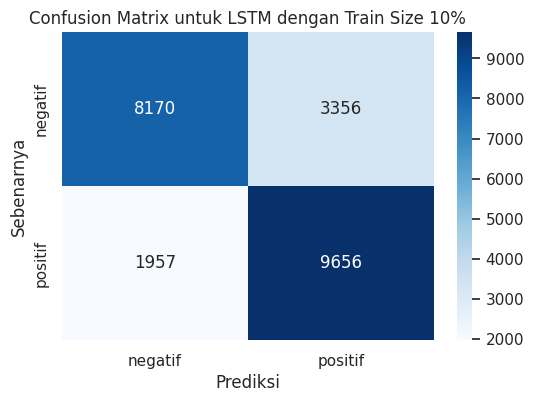

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['negatif', 'positif']

# Menampilkan confusion matrix untuk model LSTM
for train_size, cm in confusion_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix untuk LSTM dengan Train Size {train_size}%')
    plt.xlabel('Prediksi')
    plt.ylabel('Sebenarnya')
    plt.show()
